In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Set the Seaborn default theme on Matmplotlib
sns.set()

In [90]:
import numpy as np
import pandas as pd
import json
from importlib import reload 
import bright_future_base as bf
reload(bf)

<module 'bright_future_base' from '\\\\wsl$\\Ubuntu-20.04\\home\\syoro\\bright-future\\src\\bright_future_base.py'>

In [109]:
# transform names to short ones for display
dict_college_names = {"Carnegie Mellon University": "CMU", 	"Massachusetts Institute of Technology" : "MIT",
"Univ. of Illinois at Urbana-Champaign": "UIUC", 'University of Illinois at Urbana-Champaign': "UIUC", "Univ. of California - Berkeley" : "Berkeley", 'University of California, Berkeley': 'Berkeley', "Univ. of California - San Diego": "UCSD",'University of California, San Diego': "UCSD",  "Stanford University": "Stanford", "University of Michigan": "UMich", "University of Washington" : "UW", "Georgia Institute of Technology": "Georgia Tech", 	"Cornell University": "Cornell", 'University of Toronto': "U of Toronto", "University of Waterloo": "UWaterloo", 'University of Texas at Austin': "UT Austin"}

# Authoring

In [10]:
data_works = bf.load_df_works(small=False)

In [11]:
data_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166929 entries, 0 to 166928
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   author         166929 non-null  object 
 1   dept           166928 non-null  object 
 2   area           166928 non-null  object 
 3   count          166928 non-null  float64
 4   adjustedcount  166928 non-null  float64
 5   year           166928 non-null  float64
 6   field          166929 non-null  object 
dtypes: float64(3), object(4)
memory usage: 8.9+ MB


In [119]:
data_works['area'].value_counts()

aaai      8985
cvpr      8507
nips      7199
ijcai     6617
icra      5872
          ... 
sosp       645
wine       623
emsoft     620
rtas       572
fast       481
Name: area, Length: 75, dtype: int64

In [87]:
# get 10 most published
works_most_institute = data_works.groupby('dept').size().sort_values(ascending=False)[:10].to_frame('count').reset_index()
works_most_institute

works_most_institute['dept_short'] = works_most_institute.apply(lambda x: dict_college_names[x['dept']], axis=1)

Text(0.5, 0, 'Institution')

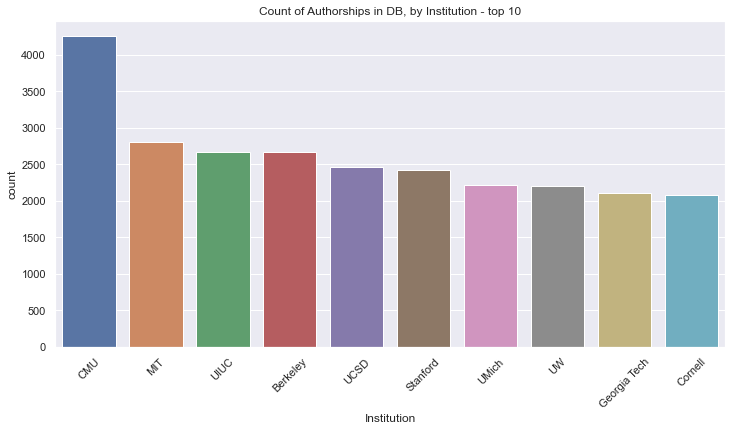

In [89]:
ax = sns.barplot(x = 'dept_short', y = 'count', data = works_most_institute)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,6)
plt.title("Count of Authorships in DB, by Institution - top 10") 
plt.xlabel("Institution")

In [55]:
works_most_field = data_works.groupby('field').size().sort_values(ascending=False)[:9].to_frame('count').reset_index()
works_most_field

,field,count
0,ML,15841
1,Vision,15809
2,AI,15602
3,Theory,11621
4,Robotics,11437
5,DB,11385
6,NLP,9040
7,Security,8377
8,HCI,6435


Text(0.5, 0, 'Field')

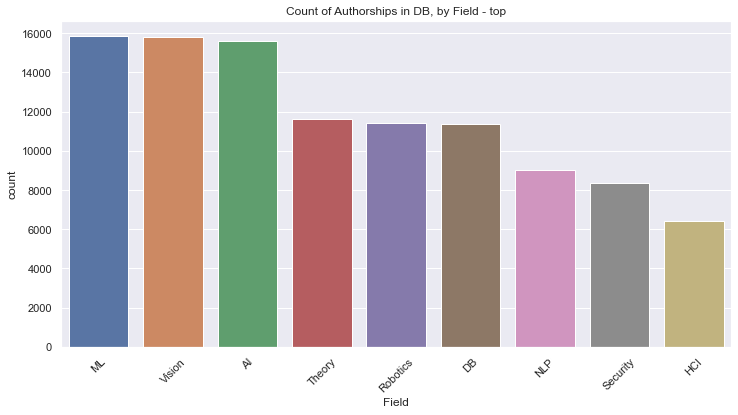

In [59]:
ax = sns.barplot(x = 'field', y = 'count', data = works_most_field)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,6)
plt.title("Count of Authorships in DB, by Field - top") 
plt.xlabel("Field")

In [126]:
works_by_year = data_works.groupby('year').sum()
works_by_year = works_by_year['adjustedcount'].reset_index()
works_by_year.tail()
#truncate 2022, incomplete ofc
works_by_year=works_by_year.drop(index=52)
works_by_year.tail()

,year,adjustedcount
47,2017.0,3467.816077
48,2018.0,3984.960100
49,2019.0,4471.051980
50,2020.0,4579.424393
51,2021.0,4246.627010


Text(0.5, 0, 'Year')

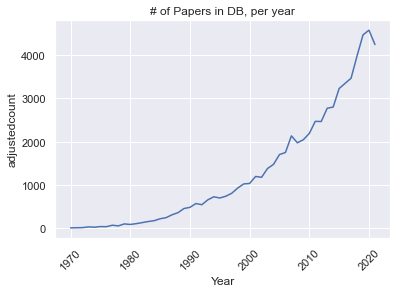

In [128]:
ax = sns.lineplot(data = works_by_year, x = 'year', y = 'count')
plt.xticks(rotation=45)
# plt.gcf().set_size_inches(12,6)
plt.title("# of Authorships in") 
plt.xlabel("Year")

# Professors

In [91]:
data_profs = bf.load_profs()

In [105]:
# get 10 most published
prof_most_uni = data_profs.groupby('University').size().sort_values(ascending=False)[:10].to_frame('count').reset_index()

prof_most_uni['uni_short'] = prof_most_uni.apply(lambda x: dict_college_names[x['University']], axis=1)
prof_most_uni


,University,count,uni_short
0,Carnegie Mellon University,207,CMU
1,Georgia Institute of Technology,128,Georgia Tech
2,Massachusetts Institute of Technology,112,MIT
3,University of Toronto,107,U of Toronto
4,University of Illinois at Urbana-Champaign,103,UIUC
5,University of Waterloo,101,UWaterloo
6,University of Washington,101,UW
7,University of Michigan,99,UMich
8,"University of California, Berkeley",96,Berkeley
9,"University of California, San Diego",94,UCSD


Text(0.5, 0, 'Institution')

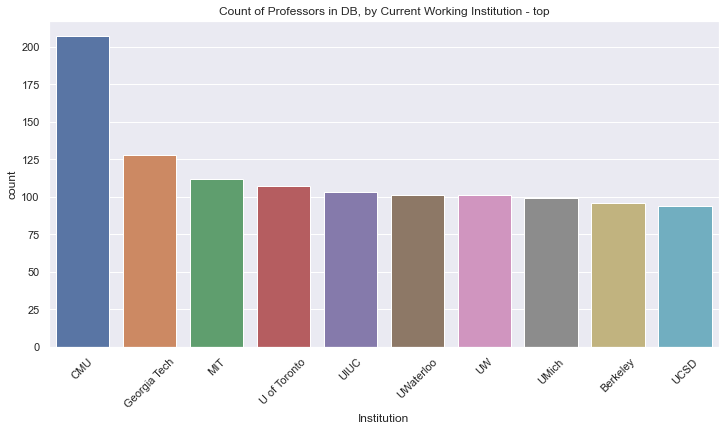

In [107]:
ax = sns.barplot(x = 'uni_short', y = 'count', data = prof_most_uni)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,6)
plt.title("Count of Professors in DB, by Current Working Institution - top") 
plt.xlabel("Institution")

In [110]:
# get 10 most published
prof_most_uni = data_profs.groupby('Doctorate').size().sort_values(ascending=False)[:10].to_frame('count').reset_index()

prof_most_uni['uni_short'] = prof_most_uni.apply(lambda x: dict_college_names[x['Doctorate']], axis=1)
prof_most_uni


,Doctorate,count,uni_short
0,Massachusetts Institute of Technology,412,MIT
1,Carnegie Mellon University,322,CMU
2,"University of California, Berkeley",292,Berkeley
3,Stanford University,263,Stanford
4,University of Illinois at Urbana-Champaign,206,UIUC
5,Cornell University,132,Cornell
6,University of Toronto,129,U of Toronto
7,Georgia Institute of Technology,129,Georgia Tech
8,University of Texas at Austin,123,UT Austin
9,University of Washington,121,UW


Text(0.5, 0, 'Institution')

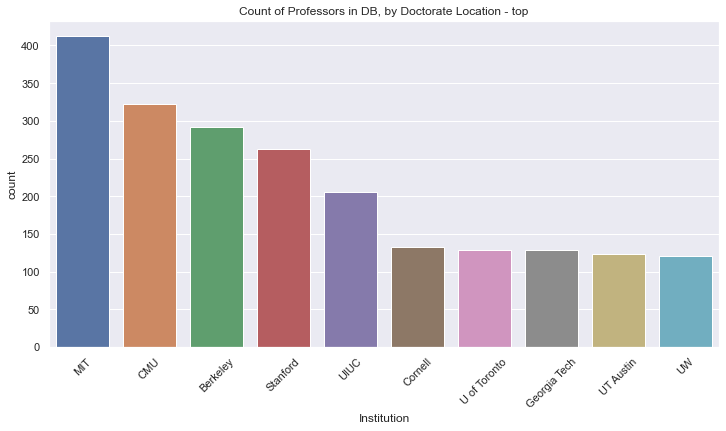

In [112]:
ax = sns.barplot(x = 'uni_short', y = 'count', data = prof_most_uni)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12,6)
plt.title("Count of Professors in DB, by Doctorate Location - top") 
plt.xlabel("Institution")